### What the need of logging
- log file
- log book
- log table 
- log libray
- log lab
- log office

computer lab log book:

S.no, Date, Name, RollNo, login time, desk no/pc no, logout

1. traking
2. debugging

debuffing => to identifying the bug and fix the bug

***Note:*** It is higly recommended to sotre complete application flow and exception information to a file. This process is called logging 

The main advantages of logging are:
1. We can use log files performing debugging.
2. we can provide statistic like number of request per day etc.

logging is language in dependent concept


Implement logging
--------------

module: logging

### logging level

depending on type of information, logging data is divided into the following levels in python.

1. CRITICAL => 50 (in java we use fateral)
    - Respresents a very serious problem that need high attention
2. ERROR = > 40
    - Represents a serious error
3. WARNING => 30 (An alert to programmer)
    - Represents a warning message, some cation needed.It is alert to the programmer
4. INFO => 20
    - Represents a message with some importasnt information
5. DEBUG => 10
    - Represent a message which can be used for dubugging
6. NOTSET => 0
    - Represents logging level not set

Default logging level: WARNING


#### How to implement logging:

- Create log file to store our log messages, we have to specift level
- basicConfig() funvtion of logging module
- `logging.basicConfig(filename='log.txt', level = logging.warning)`
- `logging.basicConfig(filename='log.txt', level = 30)`
    - automatically file will be create 30 or higger  will be shown

DEBUG(20) ==> INFO(20) ==> WARNING(30) => ERROR(40) ==> CRITICSL(50)

Write Information
------------------------
 `logging.debug(message)`<br>
 `logging.info(message)`<br>
 `logging.warning(message)`<br>
 `logging.error(message)`<br>
 `logging.critical(message)`<br>


####  Write a python program to create a log file and write WARNING and Higher level message?

- If we are not specifing file name : console
- By default in log file data will be appended
- Instead of appending if we wan't overwrite
    - filemode = 'w'
    - filemode = 'a'
    - default value for file mode: a means append



In [3]:
import logging

logging.basicConfig(filename='log.txt',level=logging.WARNING,filemode='w')

logging.debug('Debug message')
logging.info('Info message')
logging.warning('Warning message')
logging.error('Error message')
logging.critical('Critical message')


ERROR:root:Error message
CRITICAL:root:Critical message


o/p  
- WARNING:root:Warning message
- ERROR:root:Error message
- CRITICAL:root:Critical message

#### How to format log messages?
- default format of log message
- level:name of loger:message
- if we want to formate, we should go for :formate armument
    - `logging.basicConfig(formate='%(level-name)s') %(message)s`

#### Q How to add TimeStamp in log message?
`logging.basicConfig(format = '%(asctime)S %(levelname)s')`

#### Q How to change data and time formate?
`logging.basicConfig(format = '%(asctime)S %(levelname)s'),datefmt=(%d/%m/%Y %I: %M: %S %P)`
- %P => P.M/A.M
- %I => 12 Hour time scale
- %H => 12 hour time scale
- Y => capital

#### Q How to write python program exception to log file?
Note : log may not work on jupyter

In [1]:
import logging

logging.basicConfig(filename="exception_zero.log",format = '%(asctime)s %(levelname)s',filemode='w')

logging.info('New Request Come')
try:
    x=int(input("enter x "))
    y=int(input("enter y "))
    print(x/y)
except ZeroDivisionError as msg:
    logging.exception(msg)
    print(msg)
    
except TypeError as msg:
    logging.exception(msg)
    print("value id in string")
    
except ValueError as msg:
    logging.exception(msg)
    print("please enter in interge or float")
    
logging.info('Request Complete!!')

enter x 3
enter y 0
division by zero


In [6]:
import logging

logging.basicConfig(
    filename='mylog.txt',
    level=logging.DEBUG, #Debug or high level recomended
    format = '%(asctime)s %(levelname)s %(message)s', datefmt= ('%d/%m/%Y %I: %M: %S %P'),
    filemode='a')

logging.debug('Debug message')
logging.info('Info message')
logging.warning('Warning message')
logging.error('Error message')
logging.critical('Critical message')


level.INFO:root:info message
- root => logger name
- info message =>  message
- logging.debug('') => 10 => lower level

***Note:*** 
- Defautl logger is root logger 
- If we not specifiy file name data will writen to console


### loggin Levels

- CRITICAL => 50
- ERROR    => 40
- WARNING  => 30
- INFO     => 20
- DEBUG    => 10

### default logging level : WARNING

### The main advantages of logging are:
     
- We can use log file performing debugging
- We can provide statiistic number of request per day etc

### It is higly recommended to store compile application flow and Exception information to a file.

## Problems with root logger
- Root logger can handle either console or file but not simantiously 
- Root logger is the default logger

### Problems:

1. Once we set basic configuration the that configuration is final and we cannot change.
2. It will always work only one handler either file or console but not both simantiously.
3. It is not possible to configure logger with different configuation at different level.
4. We cannot specifiy multiple log files for multiple modules/classes/metods

To overcome these problems we should go for our own customized logger

### Customized logger ceration and usage
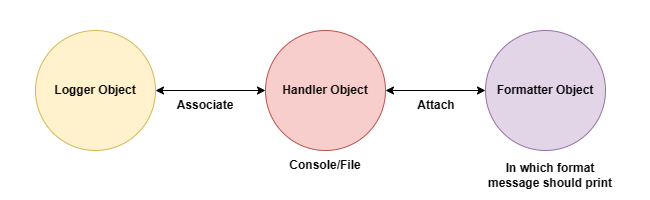

1) Creation of logger object and set log level

In [10]:
import logging
logger = logging.getLogger('demologger')
logger.setLevel(logging.DEBUG)

2) Creation of Handler Object:

- There are multiple types of handler like stramHandler, FileHandler etc
- Stream Handler =Write massage to console

In [11]:

consoleHandler = logging.StreamHandler()
# By default logger level is Handler level
consoleHandler.setLevel(logging.INFO)


3) Creation of formatter Object

In [12]:
formatter = logging.Formatter('%(asctime)s:%(name)s: %(levelname)s: %(message)s',datefmt = '%d-%m-%Y %I:%M:%S %p')
# %(name)s => logger name


4) Add Formatter to Handler

In [14]:
consoleHandler.setFormatter(formatter)


5) Add Handler to logger

In [15]:
logger.addHandler(consoleHandler)


6) Write message by using logger object

In [16]:
logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')

16-04-2024 05:23:04 PM:demologger: INFO: info message
16-04-2024 05:23:04 PM:demologger: WARNING: warn message
16-04-2024 05:23:04 PM:demologger: ERROR: error message
16-04-2024 05:23:04 PM:demologger: CRITICAL: critical message


***Note:***
- By Default logger level will be available to handler. But we can define our own level at handler level which will be the final for that handler
- Handler level should be supported by logger 
    - i.e logger log level should be lower than handler other wise only logger log level will be considered

In [26]:
# fiile handler
import logging
logger = logging.getLogger('demologger')
logger.setLevel(logging.DEBUG)

 
fileHandler = logging.FileHandler('abc.log',mode='a')
fileHandler.setLevel(logging.ERROR)


formatter = logging.Formatter('%(asctime)s:%(name)s: %(levelname)s: %(message)s',datefmt = '%d-%m-%Y %I:%M:%S %p')

fileHandler.setFormatter(formatter)

logger.addHandler(fileHandler)

logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')

16-04-2024 05:46:10 PM:demologger: INFO: info message
16-04-2024 05:46:10 PM:demologger: INFO: info message
16-04-2024 05:46:10 PM:demologger: INFO: info message
16-04-2024 05:46:10 PM:demologger: WARNING: warn message
16-04-2024 05:46:10 PM:demologger: WARNING: warn message
16-04-2024 05:46:10 PM:demologger: WARNING: warn message
16-04-2024 05:46:10 PM:demologger: ERROR: error message
16-04-2024 05:46:10 PM:demologger: ERROR: error message
16-04-2024 05:46:10 PM:demologger: ERROR: error message
16-04-2024 05:46:10 PM:demologger: CRITICAL: critical message
16-04-2024 05:46:10 PM:demologger: CRITICAL: critical message
16-04-2024 05:46:10 PM:demologger: CRITICAL: critical message


In [22]:
# for both console & filr handler
import logging
logger = logging.getLogger('demologger')
logger.setLevel(logging.INFO)

 
fileHandler = logging.FileHandler('file1.log',mode='a')
fileHandler.setLevel(logging.ERROR)

consoleHandler = logging.StreamHandler()
consoleHandler.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s:%(name)s: %(levelname)s: %(message)s',datefmt = '%d-%m-%Y %I:%M:%S %p')

fileHandler.setFormatter(formatter)
consoleHandler.setFormatter(formatter)

logger.addHandler(fileHandler)
logger.addHandler(consoleHandler)

logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')

16-04-2024 05:46:02 PM:demologger: INFO: info message
16-04-2024 05:46:02 PM:demologger: INFO: info message
16-04-2024 05:46:02 PM:demologger: INFO: info message
16-04-2024 05:46:02 PM:demologger: WARNING: warn message
16-04-2024 05:46:02 PM:demologger: WARNING: warn message
16-04-2024 05:46:02 PM:demologger: WARNING: warn message
16-04-2024 05:46:02 PM:demologger: ERROR: error message
16-04-2024 05:46:02 PM:demologger: ERROR: error message
16-04-2024 05:46:02 PM:demologger: ERROR: error message
16-04-2024 05:46:02 PM:demologger: CRITICAL: critical message
16-04-2024 05:46:02 PM:demologger: CRITICAL: critical message
16-04-2024 05:46:02 PM:demologger: CRITICAL: critical message


### Use multiple log files for multiple module


####  Use separate log file for every module

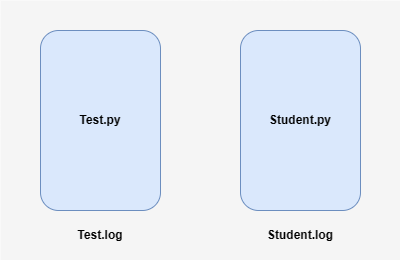


#### Student.py

In [62]:
import logging

logger = logging.getLogger('studentLogger')
logger.setLevel(logging.DEBUG)

fileHandler = logging.FileHandler('student.log', mode='a')

# fileHandler = logging.FileHandler('student.log',mode = 'a')
fileHandler.setLevel(logging.ERROR)


# formatter = logging.Formatter('%(asctime)s:%(name)s: %(levelname)s: %(message)s',datefmt = '%d-%m-%Y %I:%M:%S %p')

# formatter = logging.Formatter('%(asctime)s - %(name)s - %(message)s',datefmt = '%d - %m - %Y %I:%M:%S %p')

fileHandler.setFormatter(formatter)
logger.addHandler(fileHandler)

logger.debug('deug message from student')
logger.info('Info message from student')
logger.warning('Warning message from student')
logger.error('Error message from student')
logger.critical('Critical message from student')


#### test.py

In [59]:

import logging
import student

logger = logging.getLogger('testlogger')
logger.setLevel(logging.DEBUG)

fileHandler = logging.FileHandler('test.log',mode = 'a')
fileHandler.setLevel(logging.DEBUG)


formatter = logging.Formatter('%(asctime)s-%(name)s-%(message)s',
                              datefmt = '%d-%m-%y %I:%M:%S %p')

fileHandler.setFormatter(formatter)
logger.addHandler(fileHandler)

logger.debug('deug message from test')
logger.info('Info message from test')
logger.warning('Warning message from test')
logger.error('Error message from test')
logger.critical('Critical message from test')


#### Generic Custom logger 


Importance of inspect module: (Required to define Generic custom logger, python inbuilt)
- inspect => Inspection
- from which module / function call is coming
    - stack[0] => reciver info
    - stack[1] => caller info

In [1]:
# demo.py
import inspect
def get_info():
    print(inspect.stack()[0])
    print(inspect.stack()[1])
get_info()

FrameInfo(frame=<frame at 0x00000256477F6FB0, file 'C:\\Users\\Bindra\\AppData\\Local\\Temp\\ipykernel_12064\\331804253.py', line 4, code get_info>, filename='C:\\Users\\Bindra\\AppData\\Local\\Temp\\ipykernel_12064\\331804253.py', lineno=4, function='get_info', code_context=['    print(inspect.stack()[0])\n'], index=0, positions=Positions(lineno=4, end_lineno=4, col_offset=10, end_col_offset=25))
FrameInfo(frame=<frame at 0x0000025647AAC9A0, file 'C:\\Users\\Bindra\\AppData\\Local\\Temp\\ipykernel_12064\\331804253.py', line 6, code <module>>, filename='C:\\Users\\Bindra\\AppData\\Local\\Temp\\ipykernel_12064\\331804253.py', lineno=6, function='<module>', code_context=['get_info()\n'], index=0, positions=Positions(lineno=6, end_lineno=6, col_offset=0, end_col_offset=10))


In [2]:
# demo.py
import inspect
def get_info():
    # print(inspect.stack()[0])
    # print(inspect.stack()[1])
    print("caller Module Name",inspect.stack()[1][1])    
    print("caller Function Name",inspect.stack()[1][3])    
get_info()

caller Module Name C:\Users\Bindra\AppData\Local\Temp\ipykernel_12064\111340845.py
caller Function Name <module>


In [ ]:
# student.py

from demo import getInfo
def student_f1():
    get_info()
student_f1()

#### Creation of generic logger and usage:


In [3]:
# Generic logger template
import logging
import inspect

def get_custom_logger(level):
    function_name = inspect.stack()[1][3]
    logger_name = function_name + '_logger'
    
    logger = logging.getLogger(logger_name)
    
    logger.setLevel(level)
    
    file_handler = logging.FileHandler("genric_log.log", mode='a')
    file_handler.setLevel(level)
        
    formatter = logging.Formatter('%(asctime)s:%(name)s: %(levelname)s: %(message)s',datefmt = '%d-%m-%Y %I:%M:%S %p')
    file_handler.setFormatter(formatter)
    
    logger.addHandler(file_handler)
    
    return logger

def log_student():
    logger = get_custom_logger(logging.ERROR)
    
    logger.debug('debug message')
    logger.info('info message')
    logger.warning('warn message')
    logger.error('error message')
    logger.critical('critical message')

log_student()

Need of separating logger configurations into a file or json or yml
----------------------------------------------------------------------
1. We can perform changes very easily.
2. Reusability of configurations.
3. Length of the code will be reduced and readabilty will be impoved.


In [ ]:
# logging-config.init
